# Import Libraries

In [10]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.core import Activation

In [9]:
%matplotlib inline

# Model Parameters

In [2]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 1 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

# Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

In [4]:
num_train, height, width, depth = X_train.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_test) # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [16]:
X_train[0].shape

(32, 32, 3)

# Create Model

In [5]:
def create_model():
    inp = Input(shape=(height, width, depth)) # depth goes last in TensorFlow back-end (first in Theano)
    # Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
    conv_1 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), name="conv_1", padding='same', activation='relu')(inp)
    conv_2 = Convolution2D(conv_depth_1, (kernel_size, kernel_size), name="conv_2", padding='same', activation='relu')(conv_1)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    drop_1 = Dropout(drop_prob_1)(pool_1)
    # Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
    conv_3 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), name="conv_3", padding='same', activation='relu')(drop_1)
    conv_4 = Convolution2D(conv_depth_2, (kernel_size, kernel_size), name="conv_4", padding='same', activation='relu')(conv_3)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    drop_2 = Dropout(drop_prob_1)(pool_2)
    # Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
    flat = Flatten()(drop_2)
    hidden = Dense(hidden_size, activation='relu')(flat)
    drop_3 = Dropout(drop_prob_2)(hidden)
    out = Dense(num_classes, activation='softmax')(drop_3)

    new_model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

    new_model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
                  optimizer='adam', # using the Adam optimiser
                  metrics=['accuracy']) # reporting the accuracy
    return new_model

In [6]:
model = create_model()

# Fit Model

In [7]:
model.fit(X_train, Y_train,                # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Train on 45000 samples, validate on 5000 samples
Epoch 1/1
45000/45000 [==============================] - 709s - loss: 1.4994 - acc: 0.4556 - val_loss: 1.2360 - val_acc: 0.5654


# Evaluate Model

In [8]:
model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!

 9984/10000 [============================>.] - ETA: 0s

[1.2593720308303833, 0.55530000000000002]

# Set test image 

In [49]:
test_image_index = np.random.randint(0, len(X_test) - 1)
test_image = X_test[test_image_index]

# Conv Layer 1

### Plot Test Image

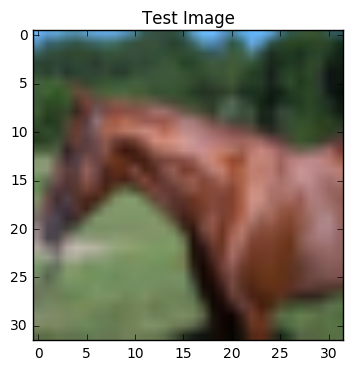

In [53]:
imshow = plt.imshow #alias
plt.title("Test Image")
imshow(test_image)

In [50]:
layer_name = "conv_1"
new_model = Model(inputs=model.input,
                  outputs=model.get_layer(layer_name).output)

In [51]:
new_model_out = new_model.predict(X_test)

### Set Hidden Layer Filters

In [54]:
filters = [new_model_out[test_image_index,:,:,filt_id] for filt_id in range(32)]

### Show Filters

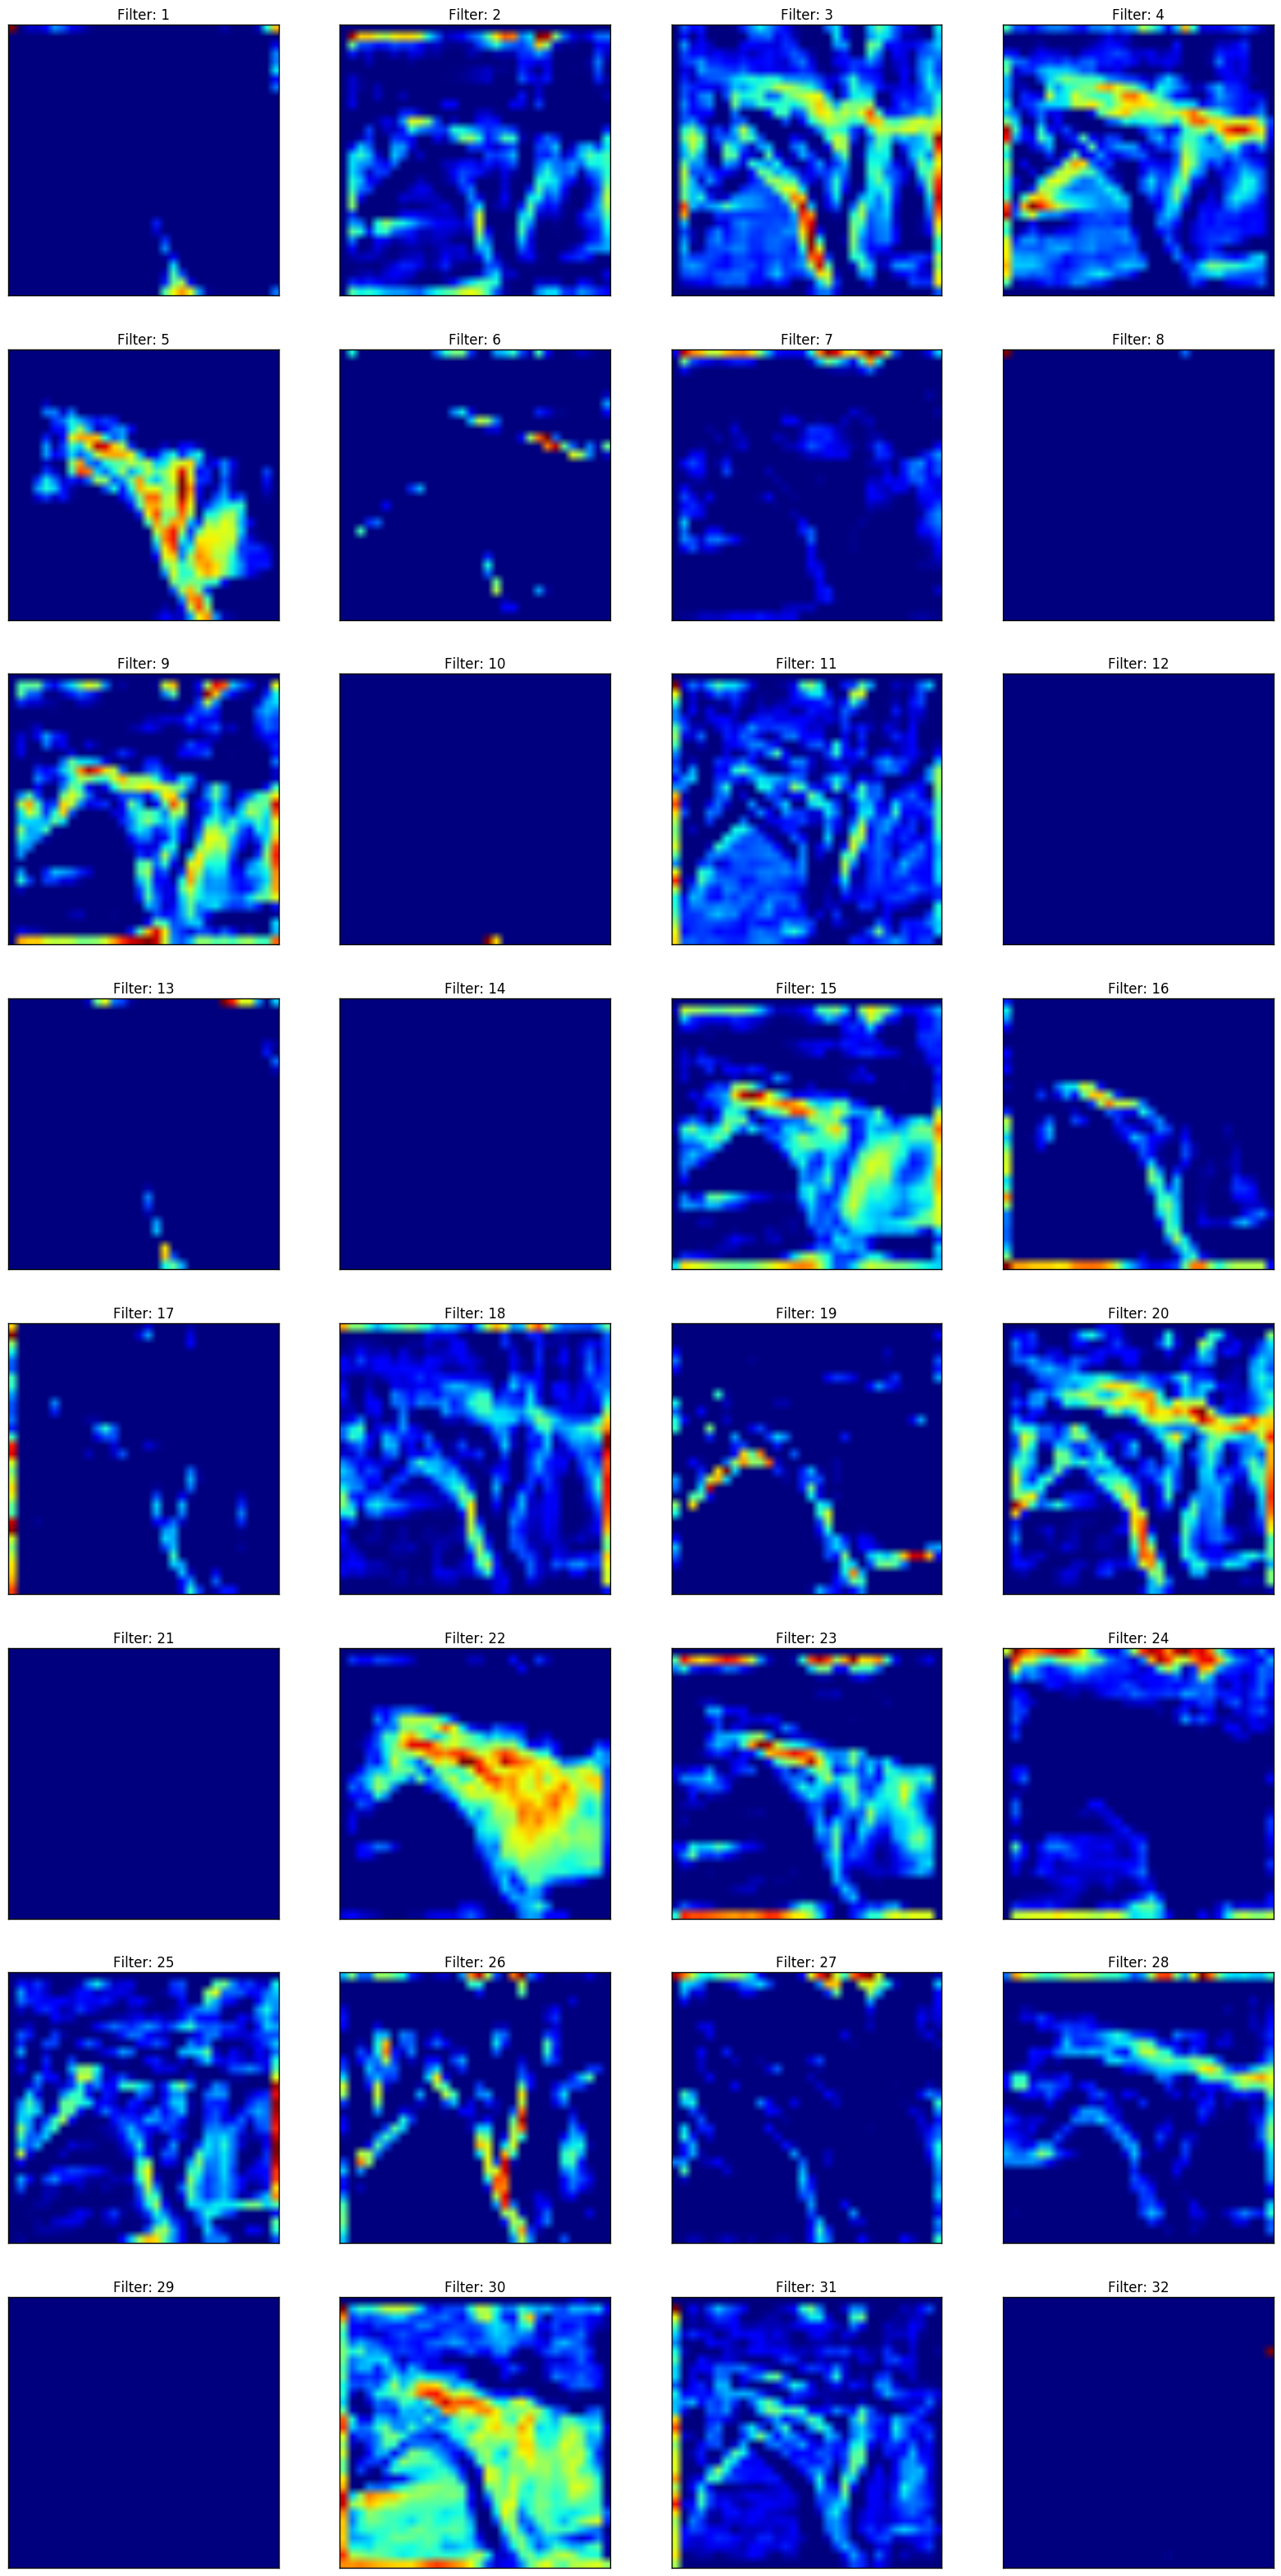

In [55]:
fig = plt.figure()

for i in range(32):
    filter_num = i+1
    ax = plt.subplot(8, 4, filter_num)
    
    imshow = plt.imshow #alias
    imshow(filters[i])
#     imshow(filters[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title("Filter: {}".format(filter_num))
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.set_figwidth(20)
fig.set_figheight(40)

# Conv Layer 2

In [56]:
layer_name = "conv_2"
new_model = Model(inputs=model.input,
                  outputs=model.get_layer(layer_name).output)

In [57]:
new_model_out = new_model.predict(X_test)

### Set Hidden Layer Filters

In [59]:
filters = [new_model_out[test_image_index,:,:,filt_id] for filt_id in range(32)]

### Show Filters

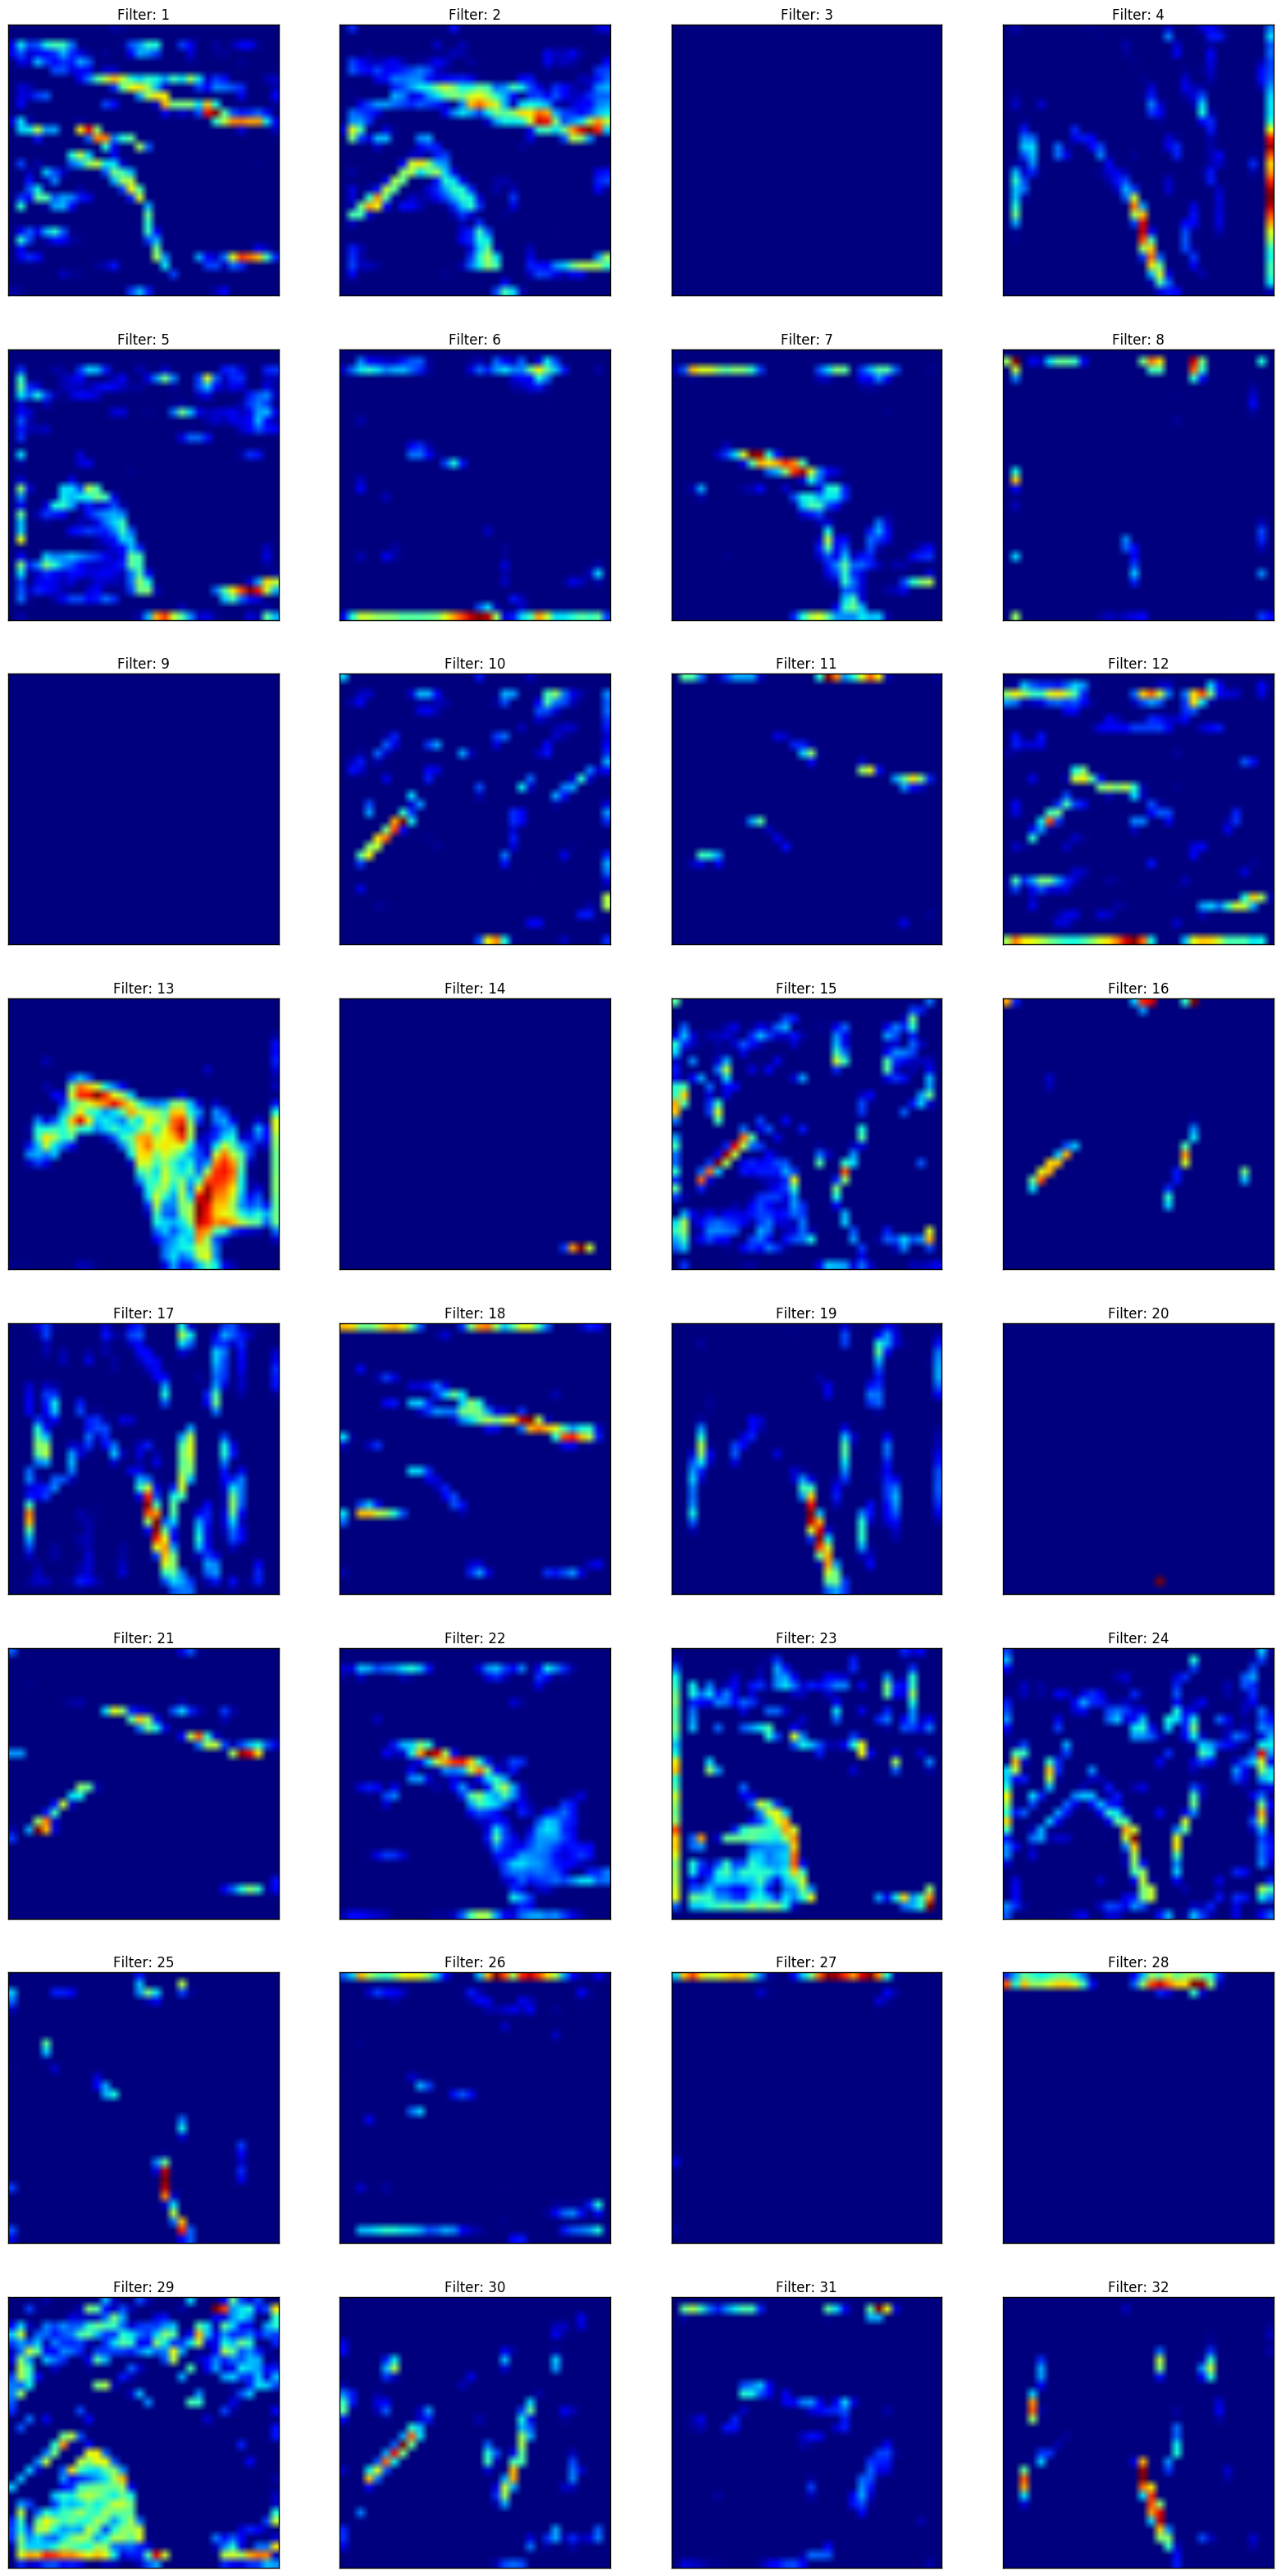

In [60]:
fig = plt.figure()

for i in range(32):
    filter_num = i+1
    ax = plt.subplot(8, 4, filter_num)
    
    imshow = plt.imshow #alias
    imshow(filters[i])
#     imshow(filters[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title("Filter: {}".format(filter_num))
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.set_figwidth(20)
fig.set_figheight(40)

# Conv Layer 3

In [61]:
layer_name = "conv_3"
new_model = Model(inputs=model.input,
                  outputs=model.get_layer(layer_name).output)

In [62]:
new_model_out = new_model.predict(X_test)

### Set Hidden Layer Filters

In [64]:
filters = [new_model_out[test_image_index,:,:,filt_id] for filt_id in range(32)]

### Show Filters

In [65]:
fig = plt.figure()

for i in range(32):
    filter_num = i+1
    ax = plt.subplot(8, 4, filter_num)
    
    imshow = plt.imshow #alias
    imshow(filters[i])
#     imshow(filters[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title("Filter: {}".format(filter_num))
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.set_figwidth(20)
fig.set_figheight(40)

# Conv Layer 4

In [66]:
layer_name = "conv_4"
new_model = Model(inputs=model.input,
                  outputs=model.get_layer(layer_name).output)

In [67]:
new_model_out = new_model.predict(X_test)

### Set Hidden Layer Filters

In [69]:
filters = [new_model_out[test_image_index,:,:,filt_id] for filt_id in range(32)]

### Show Filters

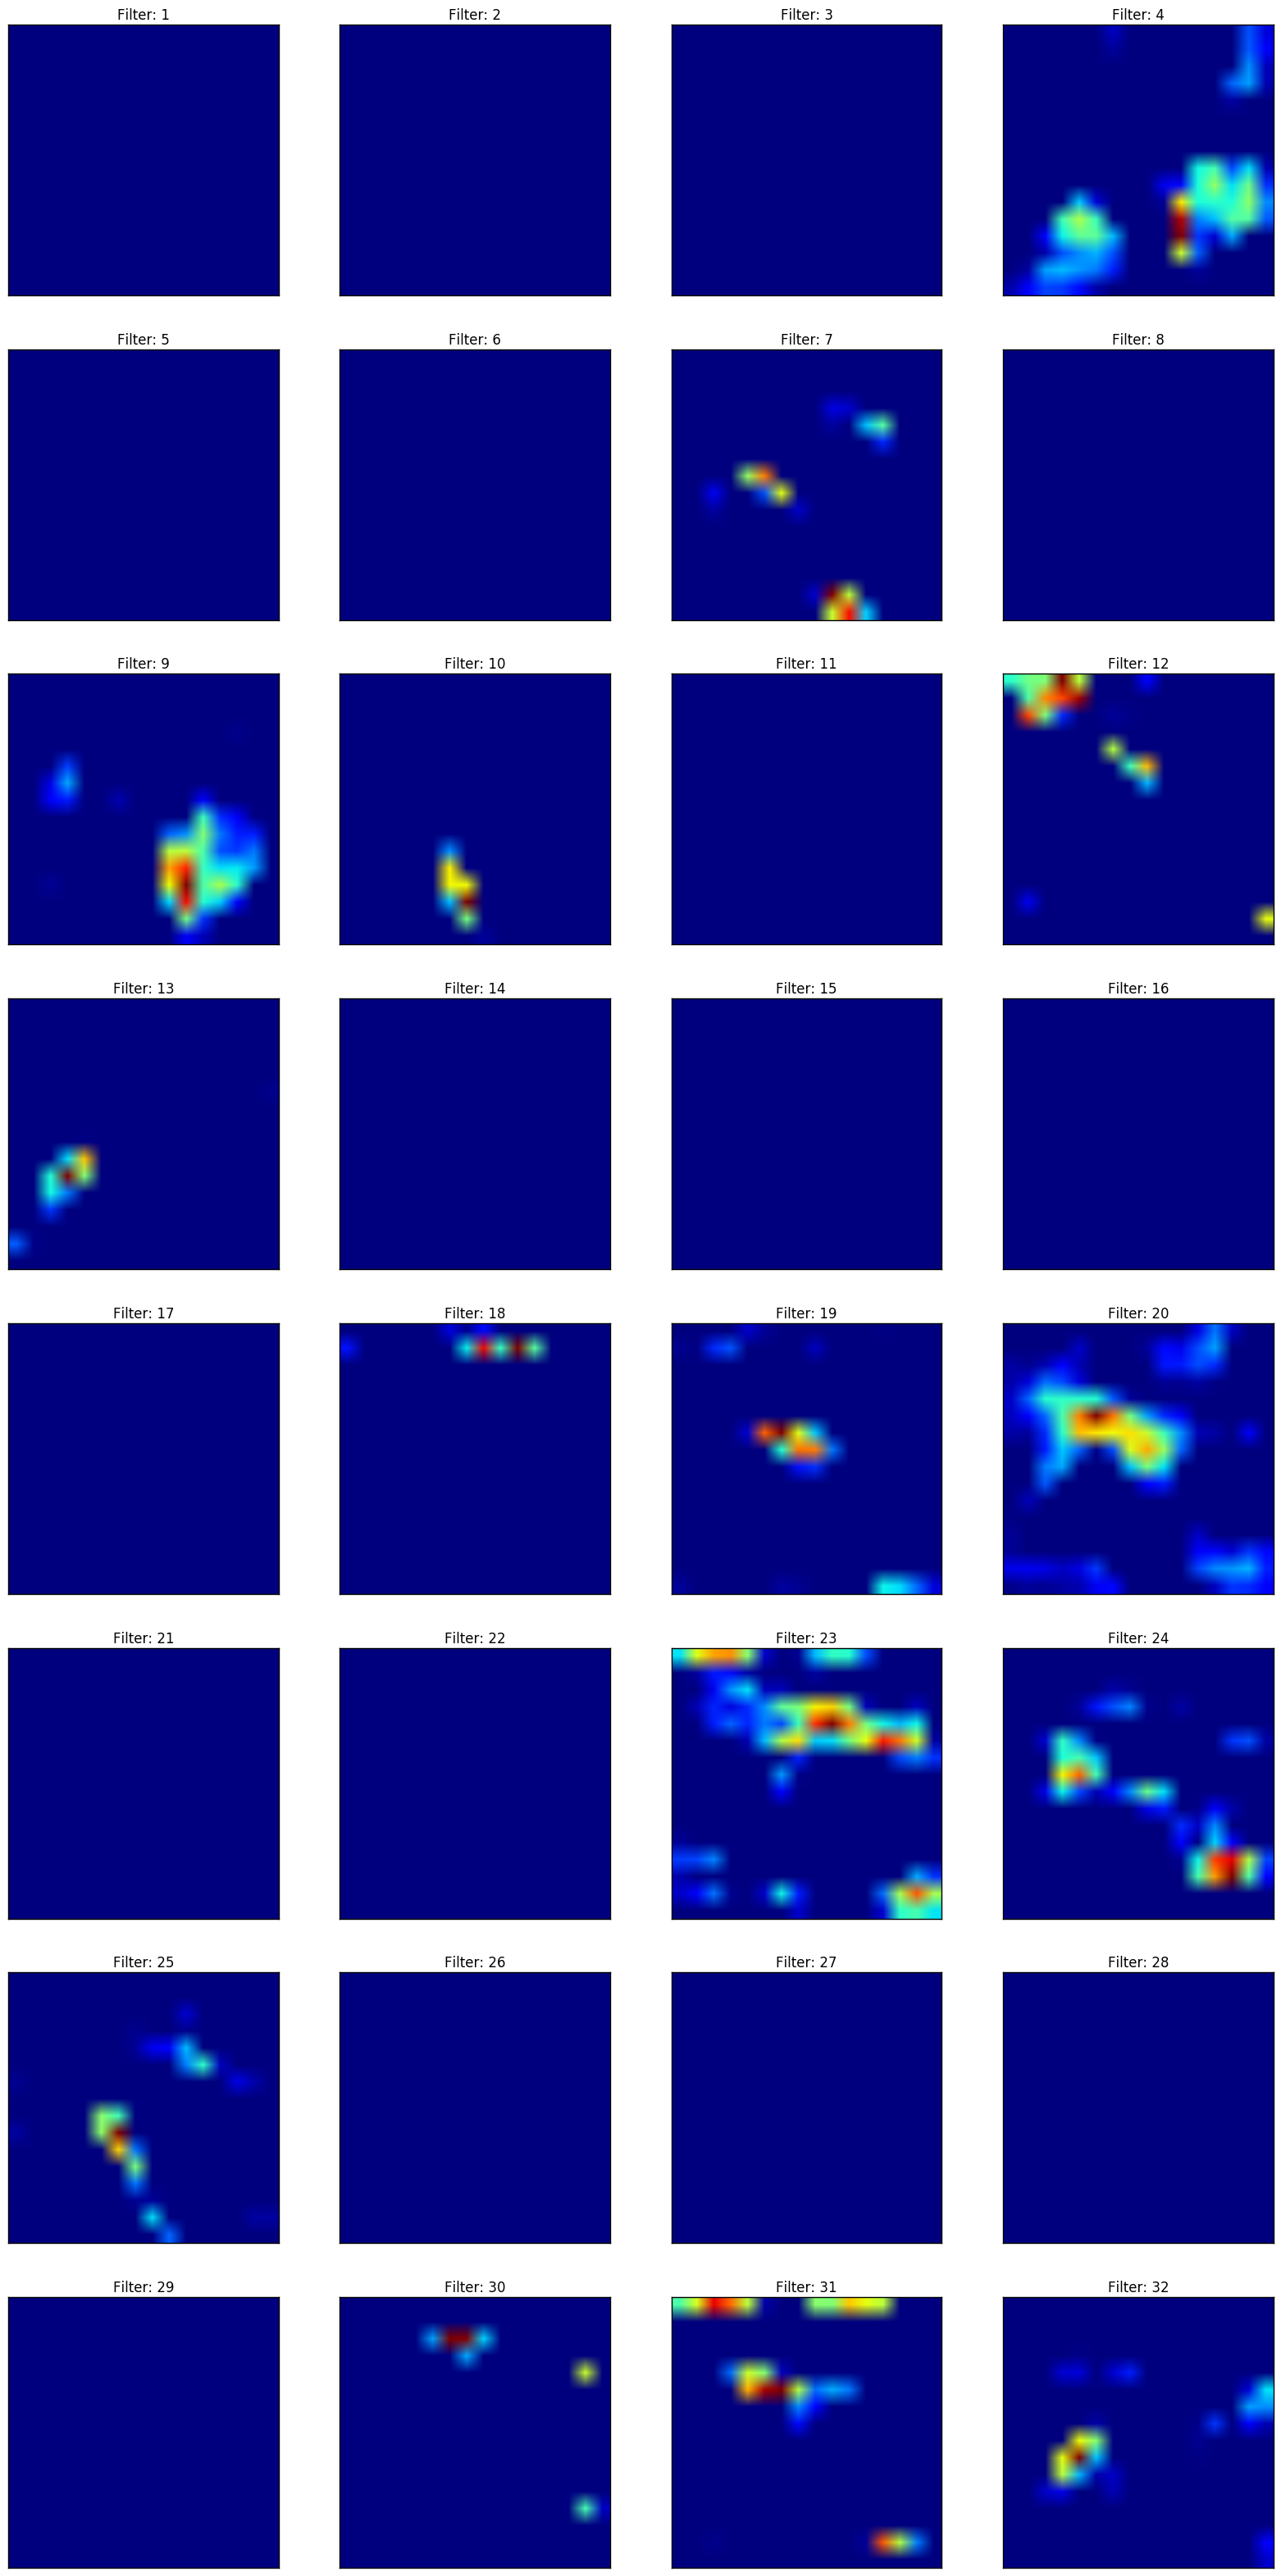

In [70]:
fig = plt.figure()

for i in range(32):
    filter_num = i+1
    ax = plt.subplot(8, 4, filter_num)
    
    imshow = plt.imshow #alias
    imshow(filters[i])
#     imshow(filters[i], cmap=plt.get_cmap('gray'))
    
    ax.set_title("Filter: {}".format(filter_num))
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.set_figwidth(20)
fig.set_figheight(40)